## Analyse des Zusammenhangs zwischen Budget und Bewertung von Filmen

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import streamlit as st
#Bekommen Daten von csv-Datai, die Information über Rating vom Filmen enthalten
df_rating=pd.read_csv("ratings.csv")
#Bekommen Daten mit Filmenmetadaten von csv-Datai(Laufzeit,Budget...).
df_metadata=pd.read_csv("movies_metadata.csv")


#Löschen alle Zeile, wo im bestimmte Spallte  NaN order nicht numeric Daten geben
def clean_not_numbers_value(df,subset):
    #Konvertieren nich numeric Daten in einer Spalter in NaN
    df[subset]=pd.to_numeric(df[subset], errors='coerce')
    #Löschen alle NaN Values
    df=df.dropna(subset=subset)
    return df
#Reinigt  Daten für die Analyse 
#Nimmt als Argument den Name einer Zeile in DataFrame mit Metadate, die quantative Values hat
def prepare_data_for_rating_analysys(df_metadata, df_rating, x_value):
    #Ratings,die zum gleigen Film gehören zuerst Gruppieren  und dann mittlere Wert von Rating für jeder Film finden
    rating_y=df_rating.groupby('movieId')['rating'].mean()
    #Indeces, die den Filmen Id entsprechen, in  Integer converieren
    rating_y.index = rating_y.index.astype(int)

    #Löschen alle Zeile, wo im bestimmte Spallte  NaN order nicht numeric Daten geben
    df_metadata=clean_not_numbers_value(df_metadata,x_value)
    #Filmenid im DataFrame in Integer convertieren
    df_metadata['id'] = df_metadata['id'].astype(int)
    #Löschen die Duplikate von Filmen(ID) im DataFrame
    df_metadata = df_metadata.drop_duplicates(subset='id', keep='first')

    #Lassen in DateFrame nur die Zeile, wo id von einem Film entspricht einem Index in der Serie und sorten mittthilfe Id vom Film
    df_metadata=df_metadata[df_metadata['id'].isin(rating_y.index)].sort_values(by='id')
    #Lassen in DateFrame nur die Zeile, wo id von einem Film entspricht einem Index in der Serie sorten mittthilfe Id vom Film
    rating_y=rating_y[rating_y.index.isin(df_metadata['id'])].sort_index()

    #Bekommen eine Serie vom DataFrame und Id von Filmen gelten as Indeces
    values_x = df_metadata.set_index("id")[x_value]

    #Test, ob die Grosse von der Serien gleich ist
    print(rating_y.size)
    print(values_x.size)
    return values_x, rating_y
values_x,rating_y=prepare_data_for_rating_analysys(df_metadata, df_rating,'budget')





C:\Users\49160\AppData\Local\Temp\ipykernel_6500\2744279578.py:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_metadata=pd.read_csv("movies_metadata.csv")


7565
7565


C:\Users\49160\AppData\Local\Temp\ipykernel_6500\2744279578.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metadata['id'] = df_metadata['id'].astype(int)


In [2]:
import numpy as np
#Zeigen Zusammenhang zwischen Bewertunen(rating_y Argument) und Values for X-Axis(values_x Argument)
#x_axis wird X-Axis Label
def show_rating_correlation(x_axis,values_x, rating_y):
    #Ausrechnen Koefizients für die lineale Funktion
    #a,b in ax+b=y
    coefficients = np.polyfit(values_x,rating_y, deg=1)
    #Gibt einen Array mit Y-Values zurück
    py=np.polyval(coefficients,values_x)
    # Setzen Diagrammgrosse(in inches)
    plt.figure(figsize=(10, 6))

    #Zeigen Grid Hintergrund
    plt.grid(True)
    #Streudiagramm erstellen 
    plt.scatter(values_x, rating_y, alpha=0.5)

    # Achsenbeschriftungen setzen
    plt.xlabel("Budget")
    plt.ylabel("Rating")

    # Titel des Diagramms setzen
    plt.title("Zusammenhangs zwischen Bewertung und Budget")

    # Eine lineare Anpassungskurve hinzufügen
    #label wird für die Legende verwendet
    # color="red"' macht die Linie rot
    plt.plot(values_x, py, label='Linear Fit', color='red')
    #Legende anzeigen
    plt.legend()
    #diagramm anzeigen
    plt.show()





C:\Users\49160\AppData\Local\Temp\ipykernel_6500\2744279578.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metadata['id'] = df_metadata['id'].astype(int)


7565
7565


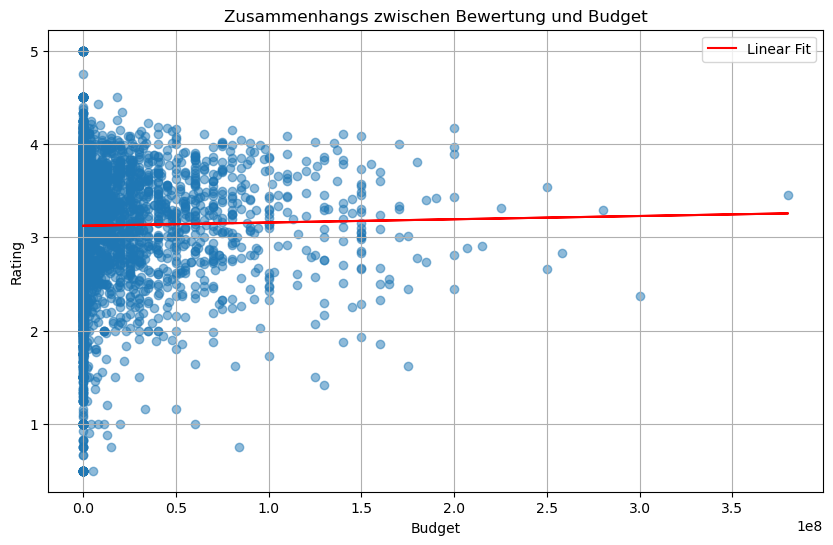

In [3]:
values_x,rating_y=prepare_data_for_rating_analysys(df_metadata,df_rating,'budget')
show_rating_correlation('Budget',values_x,rating_y)

## Analyse der durchschnittlichen Filmbewertung pro Genre

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import ast

df_metadata=pd.read_csv("movies_metadata.csv")
df_rating=pd.read_csv("ratings.csv")
#Lösche doppelt Wete in 'id' Spalte
df_metadata = df_metadata.drop_duplicates(subset='id', keep='first')
#Konvertiert zu String
df_metadata['id'] = df_metadata['id'].astype(str)
df_rating['movieId'] = df_rating['movieId'].astype(str)
df_metadata=df_metadata[['id','genres']].dropna()
df_rating=df_rating[['movieId','rating']].dropna()
df_metadata.head()

C:\Users\49160\AppData\Local\Temp\ipykernel_6500\3163078897.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_metadata=pd.read_csv("movies_metadata.csv")


,id,genres
0,862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,15602,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,31357,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,11862,"[{'id': 35, 'name': 'Comedy'}]"


In [5]:
#Konvertieren eine String zu eine Liste,wenn möglich ist
def convert_string_to_list(value):
    if isinstance(value, str):  
        try:
            return ast.literal_eval(value)
        except (ValueError, SyntaxError):
            return []  # Falls Fehler auftreten, gib eine leere Liste zurück
    return value 
# 2 DataFrames zusammenfügen
df_merged=pd.merge(df_metadata,df_rating,left_on='id',right_on='movieId',how='inner')
df_merged = df_merged.sample(n=1000)  
#Values in 'genre' Spalte in eine String konvertieren
df_merged['genres'] = df_merged['genres'].apply(lambda x:convert_string_to_list(x)) 
#'genre_names' Spalte erstellen
#Namen von Genres von 'genres' in genre_names' übertragen
df_merged['genre_names'] = df_merged['genres'].apply(lambda x: [genre['name'] for genre in x])

df_merged['genre_names'] = df_merged['genre_names'].apply(lambda x:convert_string_to_list(x)) 
#Für jerer element in Liste in  'genre_nammes' Spalte sepatrate Zeile erstellen
df_merged['genre_names']=df_merged['genre_names'].apply(lambda li:[i for i in li])
#Füllen entstehende Zeile in andere Zeilen mit entsprechende Values
exploded_df = df_merged.explode('genre_names')
exploded_df.head()



,id,genres,movieId,rating,genre_names
626965,2021,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",2021,4.0,Comedy
626965,2021,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",2021,4.0,Drama
626965,2021,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",2021,4.0,Romance
7104172,4025,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",4025,2.0,Drama
7104172,4025,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",4025,2.0,Mystery


In [6]:
#Finden Mittlewert von Bewertungen pro ein Film
rating_per_movie=exploded_df.groupby('movieId')['rating'].mean()
#Ene Serie und ein DataFrame zusammenfügen
df_rating_per_movie=pd.merge(exploded_df[['movieId','genre_names']],rating_per_movie,on='movieId',how='inner')
#eine Serie mit Mittlewert von Bewertungen pro ein Genre erstellen
rating_per_genre=df_rating_per_movie.groupby('genre_names')['rating'].mean()


#rating_per_genre=
rating_per_genre.head()

genre_names
Action       3.624378
Adventure    3.542763
Animation    3.750000
Comedy       3.593385
Crime        3.530303
Name: rating, dtype: float64

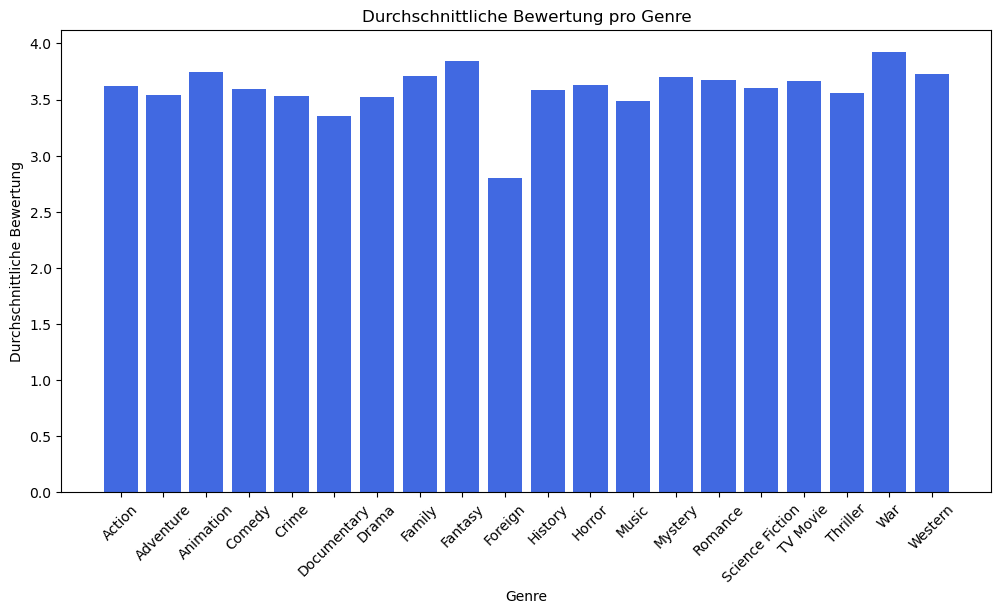

In [7]:
# Balkendiagramm erstellen
plt.figure(figsize=(12, 6))
plt.bar(rating_per_genre.index, rating_per_genre.values, color="royalblue")

# Achsenbeschriftungen und Titel setzen
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Durchschnittliche Bewertung")
plt.title("Durchschnittliche Bewertung pro Genre")

# Diagramm anzeigen
plt.show()